### getting files imported and sorted  
getting the sequences in and making sure that we get rid of duplicates and then separate genes (e.g. HA) to look at them separately. 


In [28]:
# imports
from Bio.SeqIO.FastaIO import SimpleFastaParser
import pandas as pd
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [3]:
with open('influenza.fna') as fasta_file: 
    cgi_titles = []
    cgi_sequences = []
    for title, sequence in SimpleFastaParser(fasta_file):
        cgi_titles.append(title)
        cgi_sequences.append(sequence)

In [4]:
influenza_na = pd.DataFrame(list(zip(cgi_titles, cgi_sequences)), columns=['titles','sequences'])

In [5]:
influenza_na.head()

,titles,sequences
0,gi|58576|gb|X52226|Influenza A virus (A/FPV/Ro...,AGCAAAAGCAGGAGTTCAAAATGAATCCAAATCAGAAAATAATAAC...
1,gi|59292|gb|X53029|Influenza A virus (A/USSR/9...,AGCAAAAGCAGGTAGATGTTGAAAGATGAGTCTTCTAACCGAGGTC...
2,gi|59294|gb|X59778|Influenza A virus (A/NIB/4/...,GGATCCTGTTATGTGCATTTACAGCTACAGATGCAGACACAATATG...
3,gi|59296|gb|X66320|Influenza A virus (A/Chile/...,ACACCAAATGGAACGAAAATCAGAACCCTAGAATGTTTTTGGCCAT...
4,gi|60457|gb|X08088|Influenza A virus (A/WSN/33...,ATGAGTCTTCTAACCGAGGTCGAAACGTACGTTCTCTCTATCGTCC...


In [6]:
influenza_na.shape

(655764, 2)

remove duplicate sequences

In [7]:
uniflna = influenza_na.drop_duplicates('sequences')

In [8]:
uniflna.head()

,titles,sequences
0,gi|58576|gb|X52226|Influenza A virus (A/FPV/Ro...,AGCAAAAGCAGGAGTTCAAAATGAATCCAAATCAGAAAATAATAAC...
1,gi|59292|gb|X53029|Influenza A virus (A/USSR/9...,AGCAAAAGCAGGTAGATGTTGAAAGATGAGTCTTCTAACCGAGGTC...
2,gi|59294|gb|X59778|Influenza A virus (A/NIB/4/...,GGATCCTGTTATGTGCATTTACAGCTACAGATGCAGACACAATATG...
3,gi|59296|gb|X66320|Influenza A virus (A/Chile/...,ACACCAAATGGAACGAAAATCAGAACCCTAGAATGTTTTTGGCCAT...
4,gi|60457|gb|X08088|Influenza A virus (A/WSN/33...,ATGAGTCTTCTAACCGAGGTCGAAACGTACGTTCTCTCTATCGTCC...


In [9]:
uniflna.shape

(441221, 2)

get just the HA gene sequences (for now, other genes later)

In [10]:
uniflna_HA = uniflna.loc[uniflna.iloc[:,0].str.contains(r'(HA)')]

/home/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [11]:
uniflna_HA.shape

(91179, 2)

In [13]:
np.random.seed(83475)

In [15]:
# character kgram function, out is set
def charkgram(text, k):
    results=set()
    for i in range(len(text)-k+1):
        if text[i:i+k] not in results:
            results.add(text[i:i+k])
    return(results)

In [16]:
def JacSim(a,b):
    top = len(a & b)
    bottom = len(a | b)
    return(top/bottom)

In [17]:
uniflna_HA_sub1 = uniflna_HA.sample(n=200)

In [18]:
idl=list(it.combinations(list(uniflna_HA_sub1.index),2))

In [19]:
len(idl)

19900

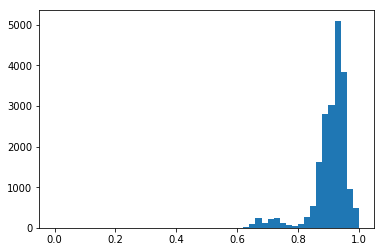

In [21]:
# k=4
JSresults4=[]
for i in idl:
    JSresults4.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],4),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],4)))
plt.hist(JSresults4, 50, range=(0,1));

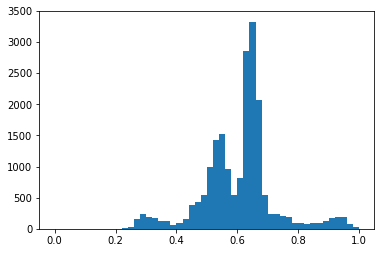

In [22]:
# k=5
JSresults5=[]
for i in idl:
    JSresults5.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],5)))
plt.hist(JSresults5, 50, range=(0,1));

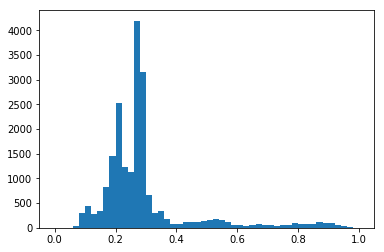

In [23]:
# k=6
JSresults6=[]
for i in idl:
    JSresults6.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],6),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],6)))
plt.hist(JSresults6, 50, range=(0,1));

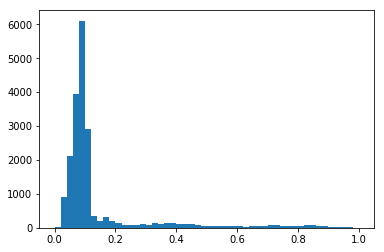

In [24]:
# k=7
JSresults7=[]
for i in idl:
    JSresults7.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],7),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],7)))
plt.hist(JSresults7, 50, range=(0,1));

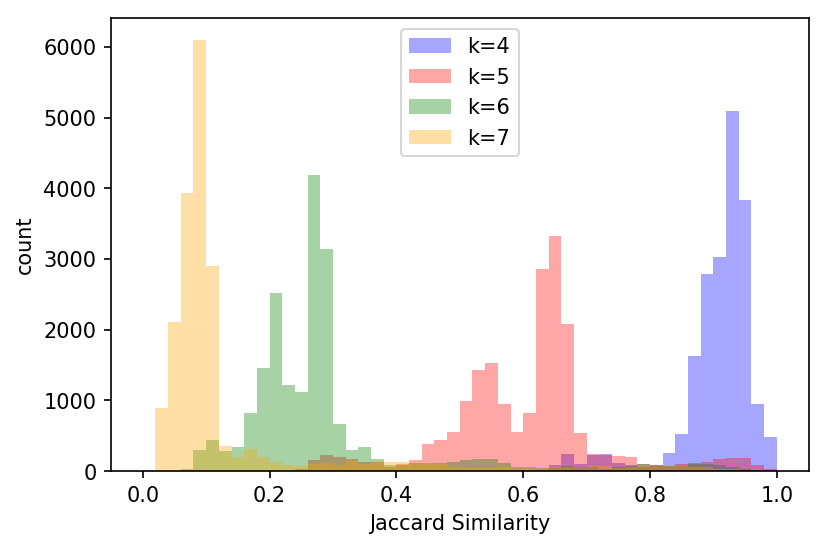

In [32]:
plt.hist(JSresults4, 50, range=(0,1), color='blue', alpha=0.35, label='k=4')
plt.hist(JSresults5, 50, range=(0,1), color='red', alpha=0.35, label='k=5')
plt.hist(JSresults6, 50, range=(0,1), color='green', alpha=0.35, label='k=6')
plt.hist(JSresults7, 50, range=(0,1), color='orange', alpha=0.35, label='k=7')
plt.xlabel("Jaccard Similarity")
plt.ylabel("count")
plt.legend();

In [33]:
def JacDist(a,b):
    top = len(a & b)
    bottom = len(a | b)
    return(1-top/bottom)

In [37]:
uniflna_HA.head()


,titles,sequences
21,gi|60504|gb|X17224|Influenza A virus (STRAIN A...,AAAACAACCAAAATGAAAGCAAAACTACTAGTCCTGTTATGTGCAT...
28,gi|60723|gb|X13551|Influenza B virus HA gene f...,ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...
29,gi|60728|gb|X13552|Influenza B virus (B/USSR/1...,ACTCATGGTAGTAACATCCAACGCAGATCGAATCTGCACTGGGATA...
30,gi|60733|gb|X13553|Influenza B virus HA gene f...,ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...
31,gi|60738|gb|X13550|Influenza B virus (B/Bonn/4...,ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...


In [52]:
uniflna_HA.iloc[0]

titles       gi|60504|gb|X17224|Influenza A virus (STRAIN A...
sequences    AAAACAACCAAAATGAAAGCAAAACTACTAGTCCTGTTATGTGCAT...
Name: 21, dtype: object

In [49]:
uniflna_HA.iloc[1]

titles       gi|60723|gb|X13551|Influenza B virus HA gene f...
sequences    ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...
Name: 28, dtype: object

In [54]:
uniflna_HA.iloc[2].sequences

'ACTCATGGTAGTAACATCCAACGCAGATCGAATCTGCACTGGGATAACATCTTCAAACTCCCCCCATGTGGTCAAAACAGCTACTCAAGGGGAAGTTAATGTGACTGGTGTGATACCACTGACAACAACACCAACCAAATCTCATTTTGCAAATCTCAAAGGAACAAAGACCAGAGGGAAACTATGCCCAAACTGTCTCAACTGCACAGATCTGGACGTGGCCTTGGGCAGACCAAAGTGTATGGGGACCATACCTTCGGCAAAAGCTTCAATACTCCACGAAGTCAAACCTGTTACATCTGGGTGCTTTCCTATAATGCACGACAGAACAAAAATCAGACAGCTACCCAATCTTCTCAGAGGATATGAAAATATCAGGTTATCAACCCGTAACGTTATCAACGCAGAAAGGGCACCAGGAGGACCCTACATAATTGGAACCTCAGGATCTTGCCCTAACGTTACCAATGGAAACGGATTCTTCGCAACAATGGCTTGGGCTGTCCCAAAAGACAACAAAACAGCAACGGATCCATTAACAATAGAAGTACCATACATTTGTACAAAAGGAGAAGACCAAATTACTGTTTGGGGGTTCCATTCTGATAACAAAAACCAAATGGTAAAACTCTATGGAGACTCAAAGCCTCAAAAGTTCACCTCATCTGCCAATGGAGTAACCACACATTATGTTTCTCAGATTGGTGGTTTCCCAAATCAAACAGAAGACGGAGGGCTACCACAAAGCGGCAGAATTGTTGTTGATTACATGGTGCAGAAACCTGGAAAACCAGGAACAATTGTCTATCAAAGAGGTGTTTTATTGCCTCAAAAAGTGTGGTGCGCAAGTGGCAGGAGCAAGGTAATAAAAGGGTCCTTGCCTTTAATTGGTGAAGCAGATTGCCTCCACGAAAAATACGGTGGATTAAACAAAAGCAAGCCTTACTACACAGGAGAACATGCAAAAGCCATAGGAAATTGCCCAATATGGGTGAAAAC

In [55]:
JacSim(charkgram(uniflna_HA.iloc[0].sequences,5), charkgram(uniflna_HA.iloc[1].sequences,5))

0.5594237695078031

In [56]:
JacSim(charkgram(uniflna_HA.iloc[1].sequences,5), charkgram(uniflna_HA.iloc[2].sequences,5))

0.8986666666666666

In [57]:
JacSim(charkgram(uniflna_HA.iloc[2].sequences,5), charkgram(uniflna_HA.iloc[3].sequences,5))

0.9014647137150466

In [58]:
JacDist(charkgram(uniflna_HA.iloc[0].sequences,5), charkgram(uniflna_HA.iloc[1].sequences,5))

0.44057623049219685

In [59]:
JacDist(charkgram(uniflna_HA.iloc[1].sequences,5), charkgram(uniflna_HA.iloc[2].sequences,5))

0.10133333333333339

In [60]:
JacDist(charkgram(uniflna_HA.iloc[2].sequences,5), charkgram(uniflna_HA.iloc[3].sequences,5))

0.09853528628495345

### Jaccard Distances!

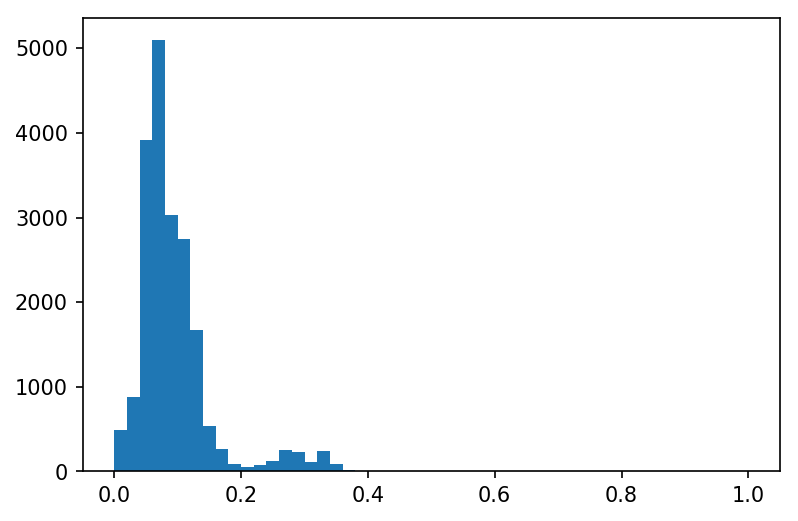

In [61]:
# k=4
JDresults4=[]
for i in idl:
    JDresults4.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],4),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],4)))
plt.hist(JDresults4, 50, range=(0,1));

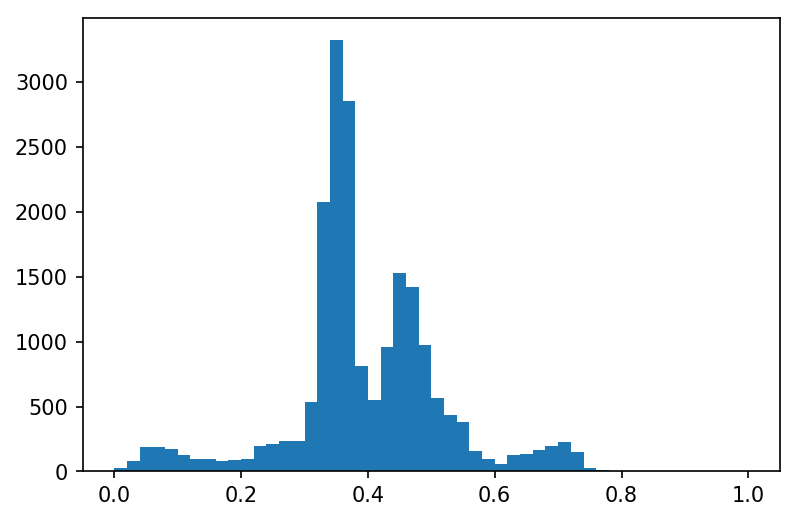

In [62]:
# k=5
JDresults5=[]
for i in idl:
    JDresults5.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],5)))
plt.hist(JDresults5, 50, range=(0,1));

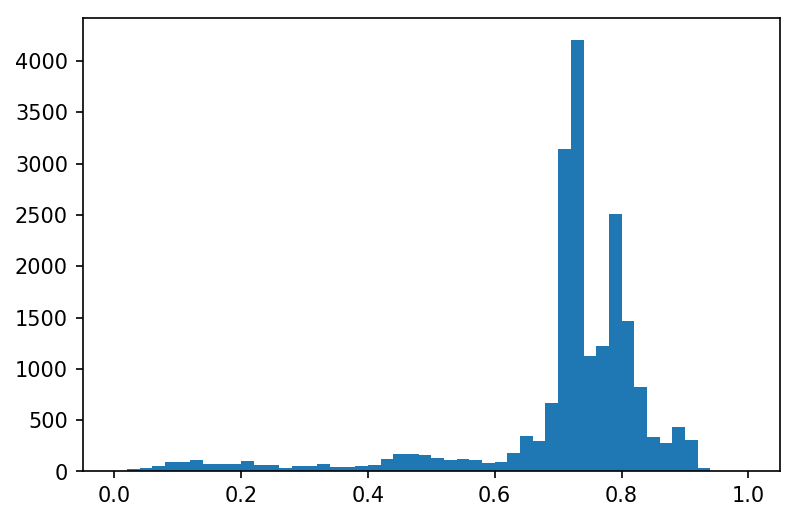

In [63]:
# k=6
JDresults6=[]
for i in idl:
    JDresults6.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],6),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],6)))
plt.hist(JDresults6, 50, range=(0,1));

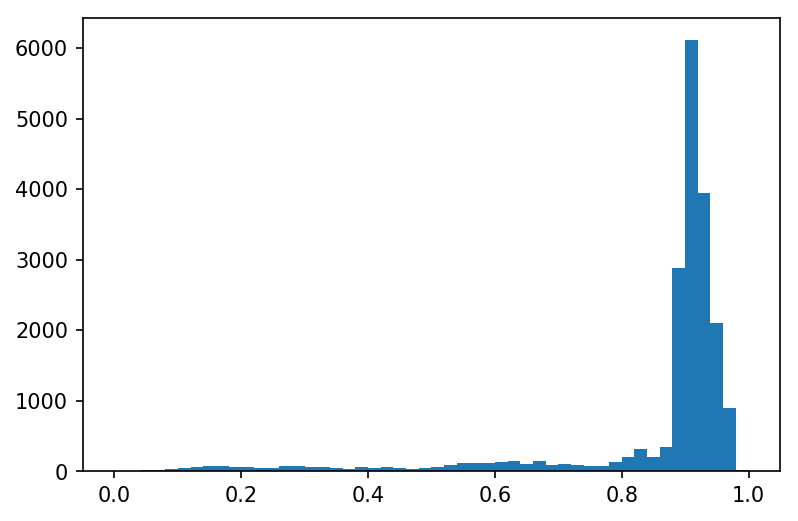

In [64]:
# k=7
JDresults7=[]
for i in idl:
    JDresults7.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],7),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],7)))
plt.hist(JDresults7, 50, range=(0,1));

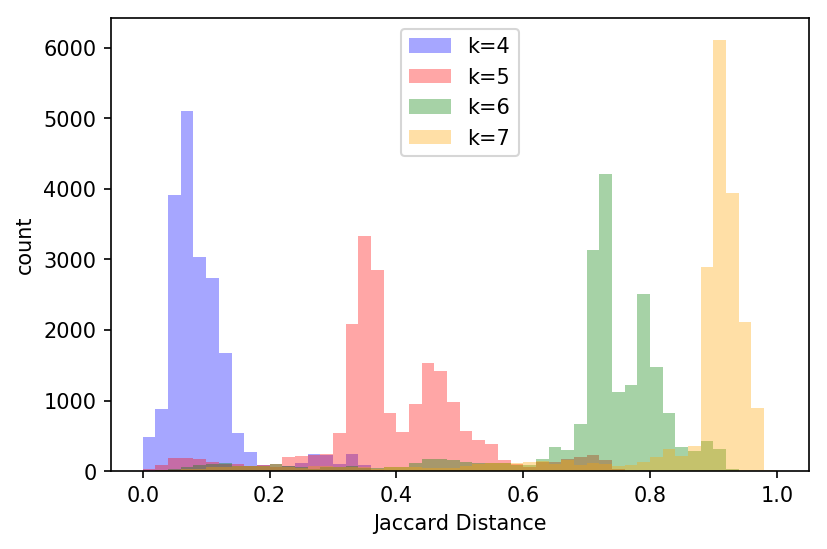

In [65]:
plt.hist(JDresults4, 50, range=(0,1), color='blue', alpha=0.35, label='k=4')
plt.hist(JDresults5, 50, range=(0,1), color='red', alpha=0.35, label='k=5')
plt.hist(JDresults6, 50, range=(0,1), color='green', alpha=0.35, label='k=6')
plt.hist(JDresults7, 50, range=(0,1), color='orange', alpha=0.35, label='k=7')
plt.xlabel("Jaccard Distance")
plt.ylabel("count")
plt.legend();

make a dataframe with the indices and JDs with different values of k.  
just to be clear, the values in the indices column are the index values from the uniflna_HA_sub1 dataframe which actually refer to the original indices.

In [66]:
Jdistance_sub1 = pd.DataFrame(
    {'indices': idl,
     'JDk4': JDresults4,
     'JDk5': JDresults5,
     'JDk6': JDresults6,
     'JDk7': JDresults7
    })

In [67]:
Jdistance_sub1.head()

,indices,JDk4,JDk5,JDk6,JDk7
0,"(36559, 299946)",0.063745,0.355713,0.701745,0.891209
1,"(36559, 220004)",0.067194,0.352047,0.699161,0.889852
2,"(36559, 421731)",0.043825,0.342404,0.737263,0.917020
3,"(36559, 256491)",0.059524,0.345266,0.722898,0.913256
4,"(36559, 332842)",0.059289,0.347826,0.720244,0.893463


In [69]:
Jdistance_sub1.tail()

,indices,JDk4,JDk5,JDk6,JDk7
19895,"(72847, 484129)",0.119522,0.501196,0.824126,0.941251
19896,"(72847, 282140)",0.116466,0.496368,0.821041,0.942578
19897,"(181132, 484129)",0.062992,0.380202,0.756404,0.921124
19898,"(181132, 282140)",0.067194,0.379819,0.751714,0.919753
19899,"(484129, 282140)",0.020243,0.083333,0.154412,0.224187


In [68]:
Jdistance_sub1.shape

(19900, 5)

### Second random sample

In [70]:
uniflna_HA_sub2 = uniflna_HA.sample(n=200)

In [71]:
idl2=list(it.combinations(list(uniflna_HA_sub2.index),2))

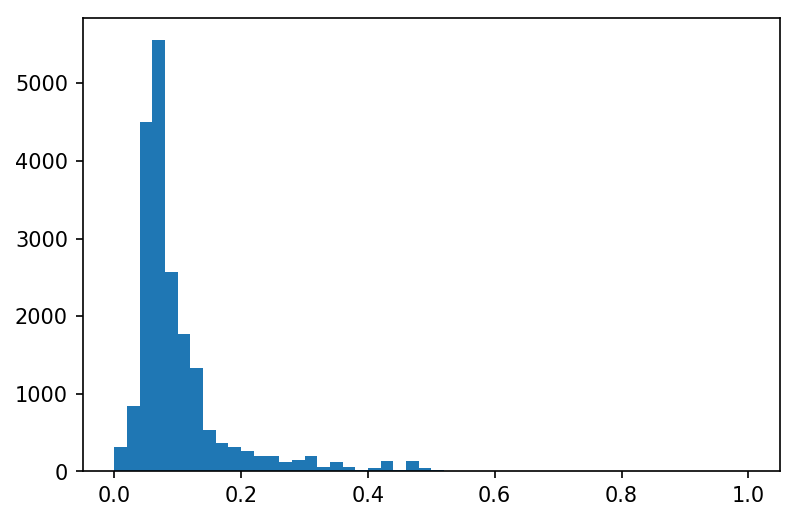

In [72]:
# k=4
JDresults42=[]
for i in idl2:
    JDresults42.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],4),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],4)))
plt.hist(JDresults42, 50, range=(0,1));

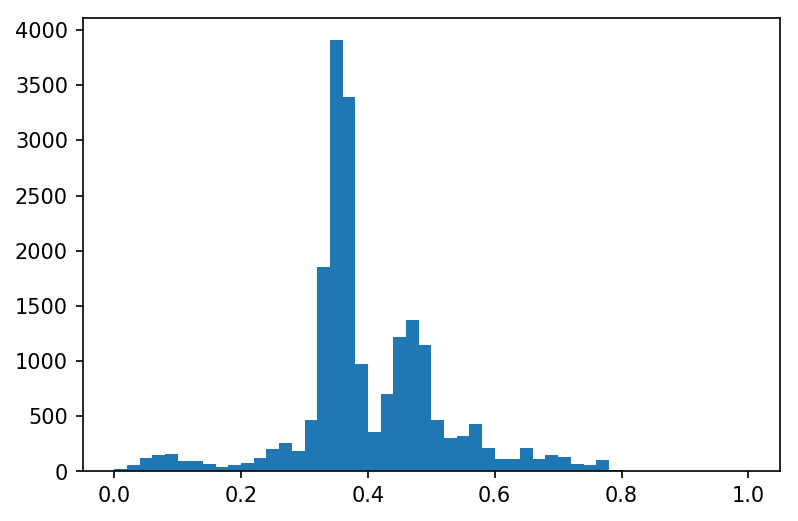

In [73]:
# k=5
JDresults52=[]
for i in idl2:
    JDresults52.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],5)))
plt.hist(JDresults52, 50, range=(0,1));

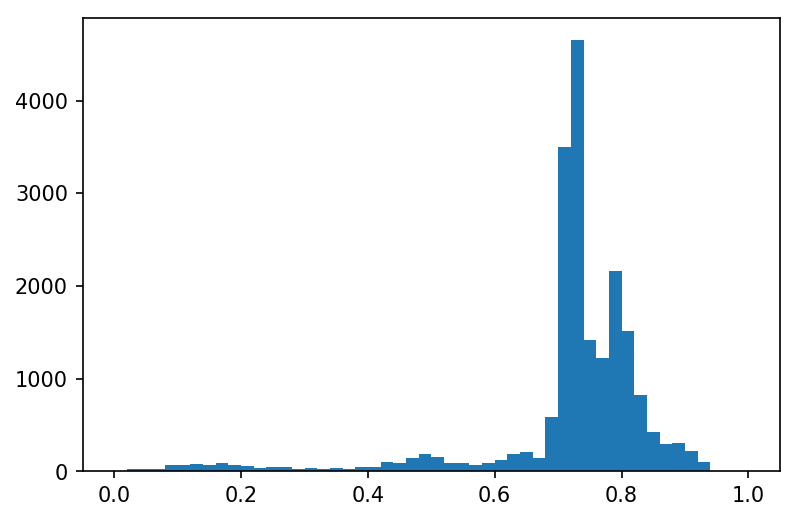

In [74]:
# k=6
JDresults62=[]
for i in idl2:
    JDresults62.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],6),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],6)))
plt.hist(JDresults62, 50, range=(0,1));

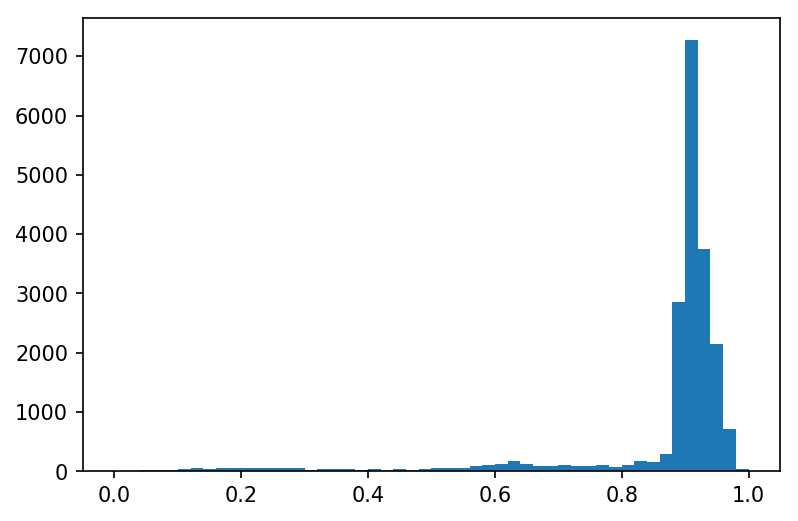

In [75]:
# k=7
JDresults72=[]
for i in idl2:
    JDresults72.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],7),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],7)))
plt.hist(JDresults72, 50, range=(0,1));

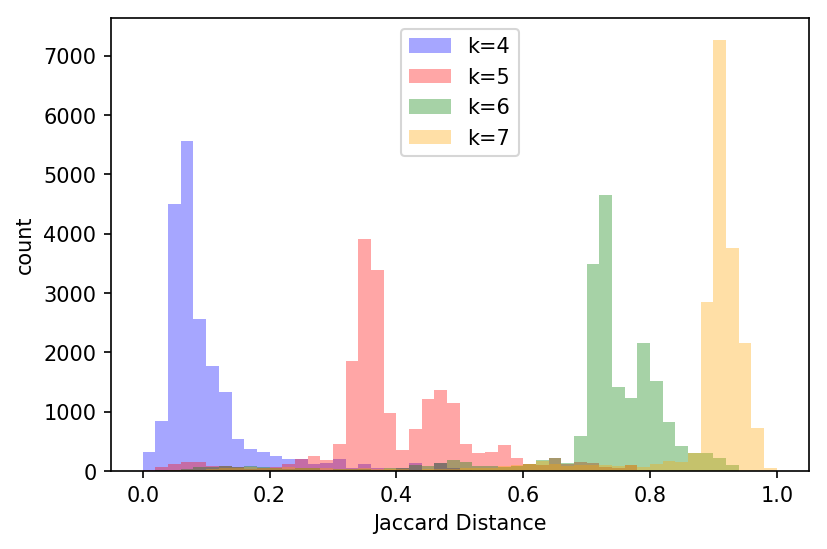

In [76]:
plt.hist(JDresults42, 50, range=(0,1), color='blue', alpha=0.35, label='k=4')
plt.hist(JDresults52, 50, range=(0,1), color='red', alpha=0.35, label='k=5')
plt.hist(JDresults62, 50, range=(0,1), color='green', alpha=0.35, label='k=6')
plt.hist(JDresults72, 50, range=(0,1), color='orange', alpha=0.35, label='k=7')
plt.xlabel("Jaccard Distance")
plt.ylabel("count")
plt.legend();

In [77]:
# dataframe of distances for sub-sample2
Jdistance_sub2 = pd.DataFrame(
    {'indices': idl2,
     'JDk4': JDresults42,
     'JDk5': JDresults52,
     'JDk6': JDresults62,
     'JDk7': JDresults72
    })

In [78]:
Jdistance_sub2.head()

,indices,JDk4,JDk5,JDk6,JDk7
0,"(336841, 401038)",0.066929,0.349261,0.731695,0.899329
1,"(336841, 355180)",0.063492,0.342890,0.720160,0.894974
2,"(336841, 450972)",0.055556,0.360599,0.713777,0.898187
3,"(336841, 548731)",0.063492,0.325960,0.698869,0.891235
4,"(336841, 376013)",0.135135,0.488704,0.793244,0.936017


In [79]:
Jdistance_sub2.tail()

,indices,JDk4,JDk5,JDk6,JDk7
19895,"(172705, 236963)",0.115672,0.378652,0.750128,0.916201
19896,"(172705, 170099)",0.131868,0.419283,0.756377,0.916667
19897,"(8386, 236963)",0.068548,0.343075,0.578772,0.696038
19898,"(8386, 170099)",0.124031,0.463120,0.776075,0.924017
19899,"(236963, 170099)",0.096154,0.371332,0.719272,0.898752


In [81]:
Jdistance_sub2.sample(12)

,indices,JDk4,JDk5,JDk6,JDk7
12037,"(288642, 412221)",0.052000,0.257485,0.484501,0.626305
16839,"(220097, 75681)",0.075697,0.364377,0.697927,0.872753
19521,"(361824, 170099)",0.190311,0.392739,0.732268,0.905506
17020,"(12627, 257060)",0.078431,0.360656,0.747629,0.906570
6250,"(1858, 296365)",0.060976,0.349288,0.598920,0.710744
1715,"(304755, 18491)",0.116000,0.461255,0.770581,0.925518
7618,"(43280, 352105)",0.067729,0.414545,0.761143,0.925834
16920,"(313288, 5217)",0.075099,0.364055,0.733199,0.909830
7440,"(305821, 442756)",0.066929,0.367442,0.710010,0.884975
18103,"(237758, 234403)",0.067460,0.378472,0.717962,0.899217
